Data zoeken van Amerika van hoeveel automobilisten, percentage verzekerde mensen en percentage ongelukken van verzekerde mensen

National average of $1,730 per year or $144 per month for full coverage

(1) State Farm:
Coverage Type	      Cost Per Month	Cost Per Year
Full coverage	            $104	       $1,250
Minimum coverage	        $52	           $625


Updated: Aug 10, 2023:
Car Insurance Provider	Average Monthly Cost	Average Annual Cost
USAA	                      $88	                  $1,054
Erie Insurance	              $103	                  $1,238
Nationwide	                  $107	                  $1,281
Geico	                      $109	                  $1,308
Auto-Owners Insurance	      $111	                  $1,337
State Farm	                  $123	                  $1,481
American Family Insurance	  $128	                  $1,537
Progressive	                  $134	                  $1,611
Travelers	                  $139	                  $1,669
Allstate	                  $174	                  $2,088
Farmers	                      $178	                  $2,140

Data zoeken van Amerika van hoeveel automobilisten, percentage verzekerde mensen en percentage ongelukken van verzekerde mensen

- In 2023 there are a projected 243.4 million licensed drivers in the US, which includes 89% of US adults.

Updated: Aug 17 2023
The vast majority of drivers have comprehensive and collision coverage. In addition to buying liability car insurance, 79% of insured drivers buy comprehensive coverage and 75% purchase collision coverage. One in eight drivers has no car insurance (12.6%).

Collision claims are claims to an insurance company or payment of cost in repairing one's vehicle regardless of who is at fault for the damage. According to the car insurance claims database from 2018, 6.1% of all collision insurance policyholders in the US had a claim.

Inladen van modules en df:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math









In [2]:
df = pd.read_csv('US_Accidents_March23.csv')
df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors="coerce")
df["End_Time"] = pd.to_datetime(df["End_Time"], errors="coerce")
df["Year"]=df["Start_Time"].dt.year
df = df[df['Year'].isin([2020, 2021, 2022])]

Algemene explorative data

In [11]:
print(df.columns)
df.info()
df.head()

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4505118 entries, 512217 to 7246341
Data columns (total 47 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1 

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year
512217,A-512230,Source2,1,2022-09-08 05:49:30,2022-09-08 06:34:53,41.946796,-88.208092,NaN,NaN,0.00,...,False,False,False,True,False,Night,Night,Day,Day,2022
512218,A-512231,Source2,1,2022-09-08 02:02:05,2022-09-08 04:31:32,34.521172,-117.958076,NaN,NaN,0.00,...,False,False,False,False,False,Night,Night,Night,Night,2022
512219,A-512232,Source2,1,2022-09-08 05:14:12,2022-09-08 07:38:17,37.542839,-77.441780,NaN,NaN,0.00,...,False,False,False,True,False,Night,Night,Night,Night,2022
512220,A-512233,Source2,1,2022-09-08 06:22:57,2022-09-08 06:52:42,40.896629,-81.178452,NaN,NaN,0.00,...,False,False,False,False,False,Night,Night,Day,Day,2022
512221,A-512234,Source2,2,2022-09-08 06:36:20,2022-09-08 07:05:58,41.409359,-81.644318,NaN,NaN,1.91,...,False,False,False,False,False,Night,Day,Day,Day,2022


In [ ]:
# Bereken basisstatistieken voor numerieke kolommen
statistieken = df.describe()

# Toon de statistieken
print("Basisstatistieken voor numerieke kolommen:")
print(statistieken)

# Bereken modus voor alle kolommen
modus = df.mode()

# Toon de modus
print("\nModus voor alle kolommen:")
print(modus)

df schoonmaken 

specifieke slechte data aantekeningen

In [4]:
#d = df[df['State'] == 'CA']['City'].unique()
#print(d[600:1100]) #non ca cities in this list
#df['Wind_Direction'].unique()
# Saint Johns (Note: This appears twice, it should likely be St. Johns) FL state
#(Note: This appears twice, it should likely be St. Lucie) FL state

#TX state does not contain all counties

In [ ]:
# Get columns with missing values and the number of missing values in each column
columns_with_missing_values = df.columns[df.isnull().any()]
missing_values_per_column = df[columns_with_missing_values].isnull().sum()

# Iterate through columns with missing values and print the information
for column in columns_with_missing_values:
    missing_count = missing_values_per_column[column]
    print(f'"{column}" heeft {missing_count} missende waardes')

Data op landelijke schaal (Bart)

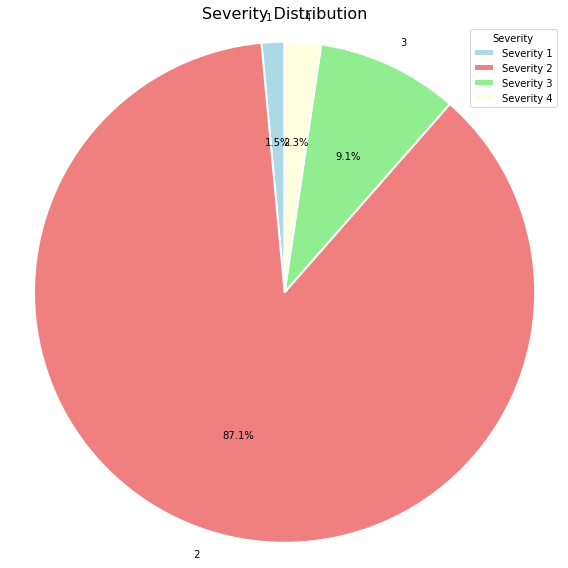

In [3]:
severity_counts = df['Severity'].value_counts().sort_index()
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightyellow']
plt.figure(figsize=(8, 8))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
plt.title('Severity Distribution', fontsize=16)
plt.legend(title='Severity', loc='upper right', labels=['Severity ' + str(s) for s in severity_counts.index])
plt.axis('equal')
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()


Total time of accidents

In [4]:
df_time = df.dropna(subset=['Start_Time'])
df_time["Month"]=df_time["Start_Time"].dt.month_name()
df_time["Day"]=df_time["Start_Time"].dt.day_name()
df_time['Hour']=df_time['Start_Time'].dt.hour

In [5]:
df_time['Duration'] = df_time.End_Time - df_time.Start_Time 
df_time['Duration'] = df_time['Duration'].apply(lambda x:round(x.total_seconds() / 60) )

conditions = [
    (df_time['Duration'] < 30),
    (df_time['Duration'] >= 30) & (df_time['Duration'] <= 60),
    (df_time['Duration'] > 60) & (df_time['Duration'] <= 120),
    (df_time['Duration'] > 120)
]

delay_values = ['30m', '60m', '120m', '>120m']

df_time['Delay'] = np.select(conditions, delay_values, default=None)

# Convert the 'Delay' column to object strings
df_time['Delay'] = df_time['Delay'].astype(str)
df_time = df_time.dropna(subset=['Delay'])
#grafiek hier van
#kijken naar verschil binnen severities


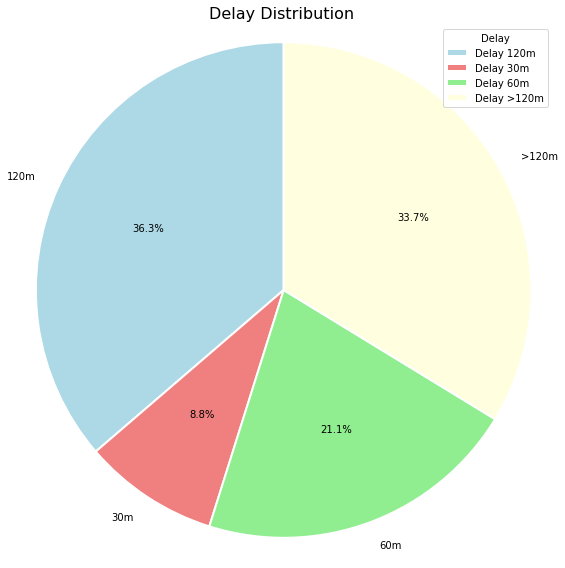

In [6]:
severity_counts = df_time['Delay'].value_counts().sort_index()
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightyellow']
plt.figure(figsize=(8, 8))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
plt.title('Delay Distribution', fontsize=16)
plt.legend(title='Delay', loc='upper right', labels=['Delay ' + str(s) for s in severity_counts.index])
plt.axis('equal')
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()

Time/Period of accidents

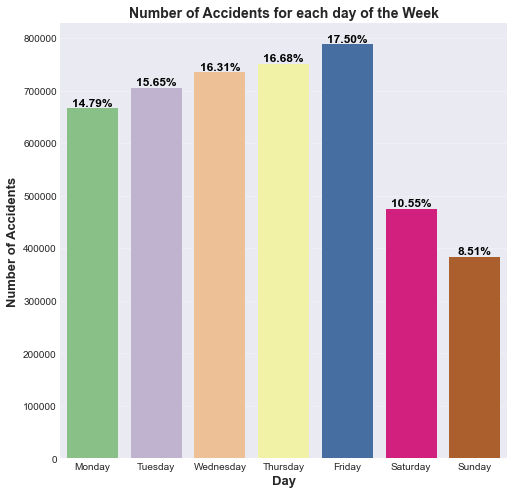

In [7]:
# Set the style
plt.style.use('seaborn-darkgrid')
custom_palette = sns.color_palette("Accent", 7)
sns.set_palette(custom_palette)

# Create a figure with a specified size
plt.figure(figsize=(8, 8))

# Add a grid with specified properties
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Define the order of days
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a countplot
sns.countplot(x=df_time["Day"], order=order)
total_counts = df_time["Day"].value_counts()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Set the x and y axis labels and title
plt.xlabel("Day", fontsize=13, fontweight="bold")
plt.ylabel("Number of Accidents", fontsize=13, fontweight="bold")
plt.title("Number of Accidents for each day of the Week", fontsize=14, fontweight="bold")

ax = plt.gca()

# Add percentage labels above the bars
for i, bar in enumerate(ax.patches):
    proportion = (total_counts[order[i]] / total_counts.sum()) * 100
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position at the center of the bar
        bar.get_height() + 500,  # Y position just above the bar
        f'{proportion:.2f}%',  # Text label with two decimal places
        fontsize=12,
        ha='center',  # Horizontal alignment
        va='bottom' if proportion > 5 else 'top',  # Adjust text position based on percentage
        fontweight='bold',
        color='black' if proportion > 5 else 'white'  # Adjust text color for visibility
    )

# Display the plot
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv('US_Accidents_March23.csv')







Algemene explorative data

In [17]:
print(df.columns)
df.info()
df.head()

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
# Bereken basisstatistieken voor numerieke kolommen
statistieken = df.describe()

# Toon de statistieken
print("Basisstatistieken voor numerieke kolommen:")
print(statistieken)

# Bereken modus voor alle kolommen
modus = df.mode()

# Toon de modus
print("\nModus voor alle kolommen:")
print(modus)

df schoonmaken 

In [2]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"])
df["End_Time"] = pd.to_datetime(df["End_Time"])

In [ ]:
#De kolomnamen met null waardes, de hoeveelheid nullwaardes en het percentage op de dataset.

TMC                     1034799     29,45% niet aanwezig
End_Lat                 2478818     70,55   (komt overeen met die eronder)
End_Lng                 2478818     70,55   (komt overeen met die erboven)
Description             1                   !!!!!! Mag eigenlijk niet null zijn  
Number                  2262864     64,40
City                    112         0,003   (100% overlap met Sunrise_Sunset)
Zipcode                 1069        0,03    (100% overlap met Timezone)
Timezone                3880        0,11    (100% overlap met Airport_Code)
Airport_Code            6758        0,19    (nul overlap met City)
Weather_Timestamp       43323       1,23    (100% overlap met Temperature(F))
Temperature(F)          65732       1,87    (100% overlap met Humidity(%))
Wind_Chill(F)           1868249     53,17
Humidity(%)             69687       1,98
Pressure(in)            55882       1,59
Visibility(mi)          75856       2,16
Wind_Direction          58874       1,68
Wind_Speed(mph)         454609      12,94
Precipitation(in)       2025874     57,66
Weather_Condition       76138       2,17
Sunrise_Sunset          115         0,003   (zelfde als de laatste drie)  
Civil_Twilight          115         0,003
Nautical_Twilight       115         0,003
Astronomical_Twilight   115         0,003

In [ ]:
# Voor de nieuwe dataset null waardes 
End_Lat                 3402762     44.03       (100% overlap End_Lng)
End_Lng                 3402762     44.03       (100% overlap End_Lat)
Description             5           0.00
Street                  10869       0.14
City                    253         0.003       (100% overlap met Sunrise_Sunset)
Zipcode                 1915        0.02        (100% overlap met Timezone)
Timezone                7808        0.10
Airport_Code            22635       0.29
Weather_Timestamp       120228      1.56
Temperature(F)          163853      2.12
Wind_Chill(F)           1999019     25.87
Humidity(%)             174144      2.25
Pressure(in)            140679      1.82
Visibility(mi)          177098      2.29
Wind_Direction          175206      2.27
Wind_Speed(mph)         571233      7.39
Precipitation(in)       2203586     28.51
Weather_Condition       173459      2.24
Sunrise_Sunset          23246       0.30           (100% overlap met onderste 4)
Civil_Twilight          23246       0.30           (100% overlap met onderste 4)
Nautical_Twilight       23246       0.30           (100% overlap met onderste 4)
Astronomical_Twilight   23246       0.30           (100% overlap met onderste 4)

In [183]:
# Doordat de End_Lat, End_Lng en Number een hoog percentage hebben waardes die leeg zijn, is het niet representatief voor nu om naar die kolommen te kijken.
# Daarnaast scheelt het tijd en proces capaciteit om ze voor nu uit het dataframe te halen.
df = df.drop(['End_Lat', 'End_Lng', 'Number'], axis=1)

specifieke slechte data aantekeningen

In [4]:
#d = df[df['State'] == 'CA']['City'].unique()
#print(d[600:1100]) #non ca cities in this list
#df['Wind_Direction'].unique()
# Saint Johns (Note: This appears twice, it should likely be St. Johns) FL state
#(Note: This appears twice, it should likely be St. Lucie) FL state

#TX state does not contain all counties

In [ ]:
# Get columns with missing values and the number of missing values in each column
columns_with_missing_values = df.columns[df.isnull().any()]
missing_values_per_column = df[columns_with_missing_values].isnull().sum()

# Iterate through columns with missing values and print the information
for column in columns_with_missing_values:
    missing_count = missing_values_per_column[column]
    print(f'"{column}" heeft {missing_count} missende waardes')

Data op landelijke schaal (Bart)

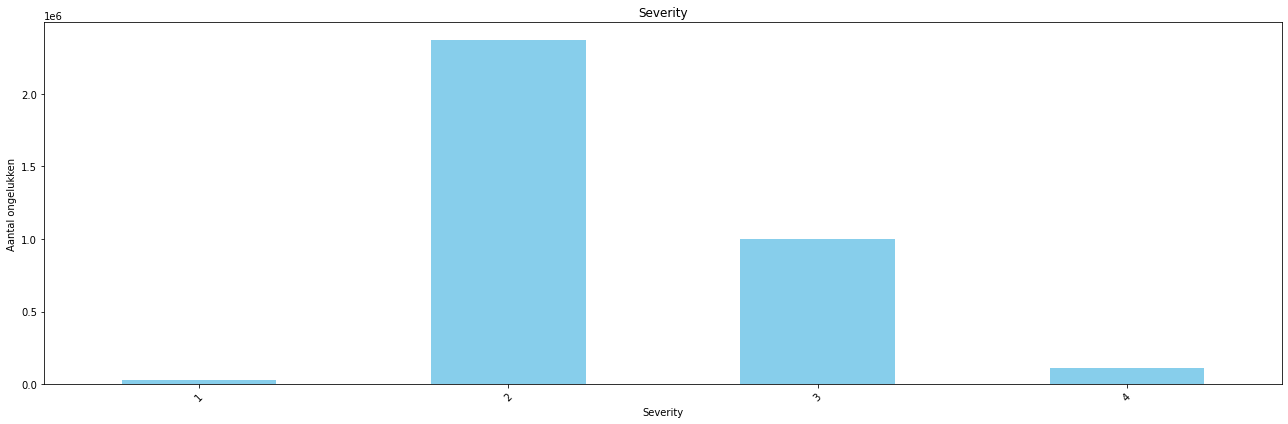

In [43]:

# Set the style
plt.style.use('seaborn-darkgrid')
custom_palette = sns.color_palette("Accent", 7)
sns.set_palette(custom_palette)

# Create a figure with a specified size
plt.figure(figsize=(8, 8))

# Add a grid with specified properties
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Define the order of days
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create a countplot
sns.countplot(x=df_time["Month"], order=order)
total_counts = df_time["Month"].value_counts()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Set the x and y axis labels and title
plt.xlabel("Month", fontsize=13, fontweight="bold")
plt.ylabel("Number of Accidents", fontsize=13, fontweight="bold")
plt.title("Number of Accidents for each month of the year", fontsize=14, fontweight="bold")

ax = plt.gca()

# Add percentage labels above the bars
for i, bar in enumerate(ax.patches):
    proportion = (total_counts[order[i]] / total_counts.sum()) * 100
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position at the center of the bar
        bar.get_height() + 500,  # Y position just above the bar
        f'{proportion:.2f}%',  # Text label with two decimal places
        fontsize=12,
        ha='center',  # Horizontal alignment
        va='bottom' if proportion > 5 else 'top',  # Adjust text position based on percentage
        fontweight='bold',
        color='black' if proportion > 5 else 'white'  # Adjust text color for visibility
    )

plt.xticks(rotation=45)
# Display the plot
plt.show()

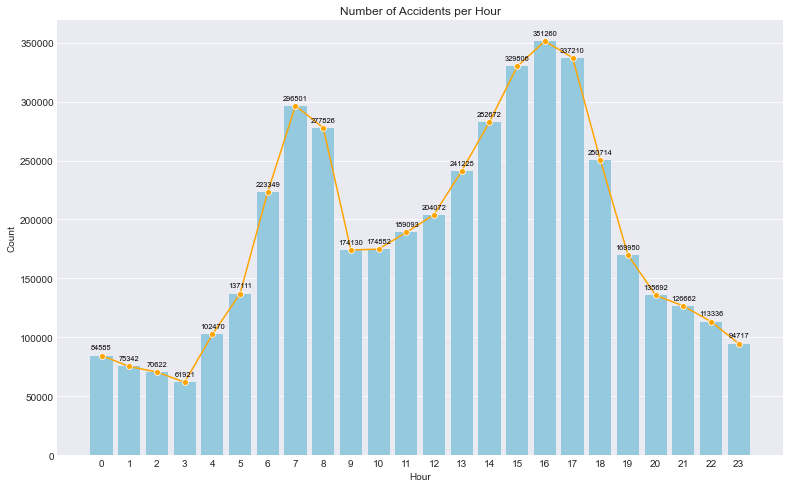

In [9]:
hour_counts = df_time["Hour"].value_counts().reset_index()
hour_counts.columns = ["Hour", "Count"]
plt.figure(figsize=(13, 8))

# Create a bar plot
ax = sns.barplot(data=hour_counts, x="Hour", y="Count", color="skyblue")

# Add a line plot on top of the bars
sns.lineplot(data=hour_counts, x="Hour", y="Count", marker="o", color="orange", ax=ax)

# Add labels to the bars with adjusted placement
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom' if height > 5 else 'top', fontsize=7.5,
                color='black', xytext=(0, 5 if height > 5 else -5), textcoords='offset points', rotation=0)

plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Number of Accidents per Hour")
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

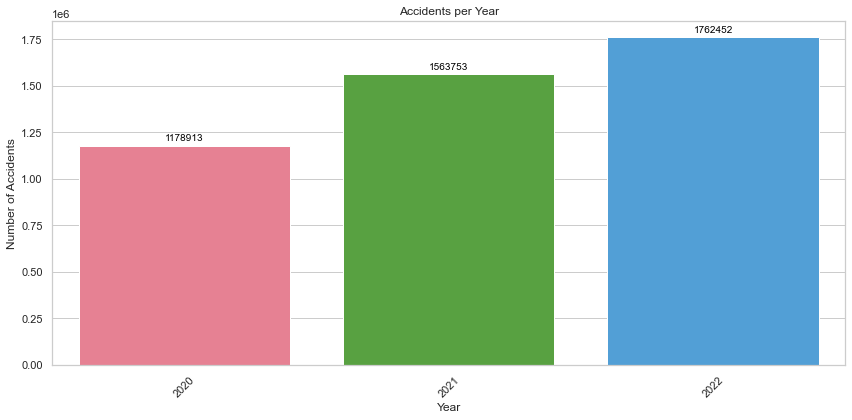

In [10]:
yearly_accident_counts = df_time.groupby(['Year']).size().reset_index(name='Accident Count')

# Set a custom color palette (optional)
custom_palette = sns.color_palette("husl", len(yearly_accident_counts))

# Set plot size and style
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create a bar plot
ax = sns.barplot(data=yearly_accident_counts, x='Year', y='Accident Count', palette=custom_palette)

# Customize the plot
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()

# Add data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

Data op individuele staten (Quint & Doena)

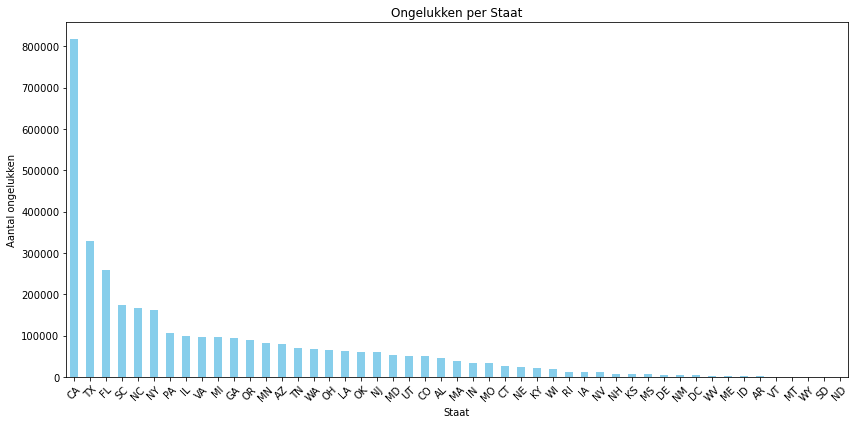

In [5]:
state_accident_counts = df['State'].value_counts()

plt.figure(figsize=(12, 6))
state_accident_counts.plot(kind='bar', color='skyblue')
plt.title('Ongelukken per Staat')
plt.xlabel('Staat')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()



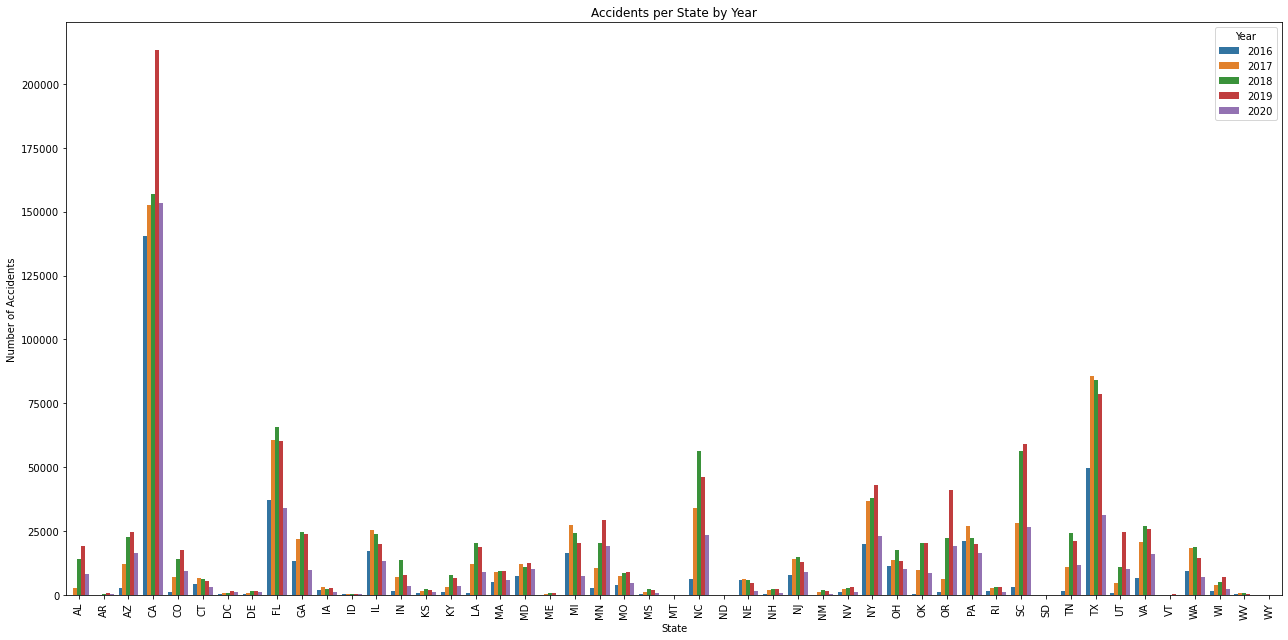

In [6]:
df['Year'] = pd.to_datetime(df['Start_Time']).dt.year

# Group by 'State', 'Year', and calculate the accident counts
state_year_accident_counts = df.groupby(['State', 'Year']).size().reset_index(name='accident_count')

plt.figure(figsize=(18, 9))

# Create a bar chart using seaborn with 'State' on the x-axis and 'Year' as hue
sns.barplot(data=state_year_accident_counts, x='State', y='accident_count', hue='Year')

plt.title('Accidents per State by Year')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.legend(title='Year', loc='upper right')
plt.tight_layout()
plt.show()

Isabel:

In [ ]:
#leuk coderen

Sophia met weer enzo:

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [45]:
selected_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

americabooleans_df = pd.DataFrame()

for column in selected_columns:
    americabooleans_df[column] = df[column].value_counts()
       
americabooleans_df = value_counts_df.fillna(0)
americabooleans_df.index.name = None


In [46]:
americabooleans_df.head()

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
False,3471535,3513011,3239091,3504053,3229168,3509233,3482442,3513433,3443296,3461641,3512216,2889994,3513617.0
True,42082,606,274526,9564,284449,4384,31175,184,70321,51976,1401,623623,0.0


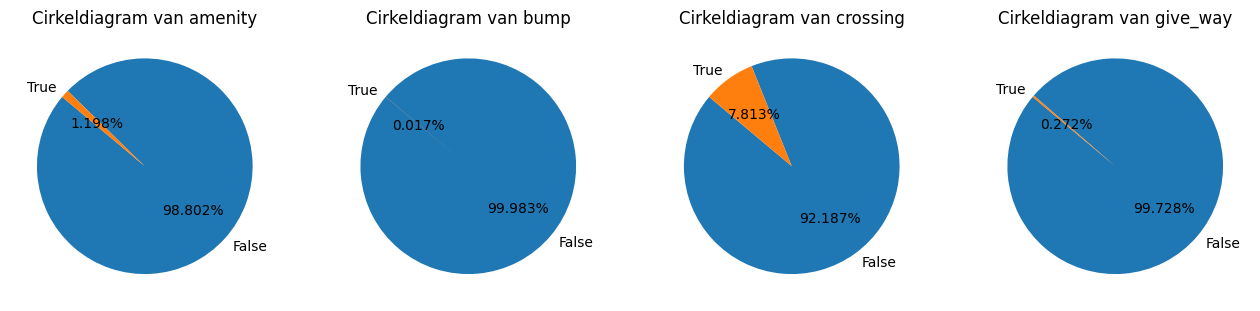

In [40]:
plt.figure(figsize=(16, 6))

plt.subplot(1,4,1)
plt.pie(americabooleans_df['Amenity'], labels= ['False', 'True'], autopct='%1.3f%%', startangle=140)
plt.title('Cirkeldiagram van amenity')

plt.subplot(1,4,2)
plt.pie(americabooleans_df['Bump'], labels= ['False', 'True'], autopct='%1.3f%%', startangle=140)
plt.title('Cirkeldiagram van bump')

plt.subplot(1,4,3)
plt.pie(americabooleans_df['Crossing'], labels= ['False', 'True'], autopct='%1.3f%%', startangle=140)
plt.title('Cirkeldiagram van crossing')

plt.subplot(1,4,4)
plt.pie(americabooleans_df['Give_Way'], labels= ['False', 'True'], autopct='%1.3f%%', startangle=140)
plt.title('Cirkeldiagram van give_way')

plt.show()

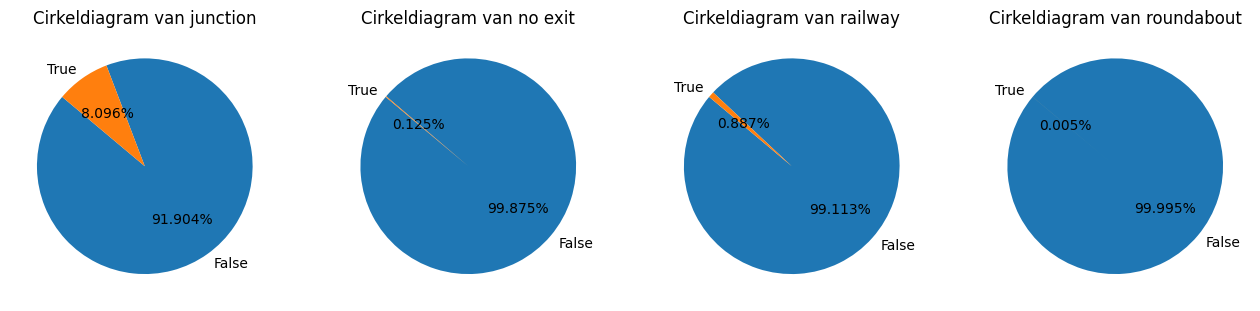

In [35]:
plt.figure(figsize=(16, 6))

plt.subplot(1,4,1)
plt.pie(americabooleans_df['Junction'], labels=['False', 'True'], autopct='%1.3f%%', startangle=140)
plt.title('Cirkeldiagram van junction')

plt.subplot(1,4,2)
plt.pie(americabooleans_df['No_Exit'], labels= ['False', 'True'], autopct='%1.3f%%', startangle=140)
plt.title('Cirkeldiagram van no exit')

plt.subplot(1,4,3)
plt.pie(americabooleans_df['Railway'], labels= ['False', 'True'], autopct='%1.3f%%', startangle=140)
plt.title('Cirkeldiagram van railway')

plt.subplot(1,4,4)
plt.pie(americabooleans_df['Roundabout'], labels= ['False', 'True'], autopct='%1.3f%%', startangle=140)
plt.title('Cirkeldiagram van roundabout')

plt.show()

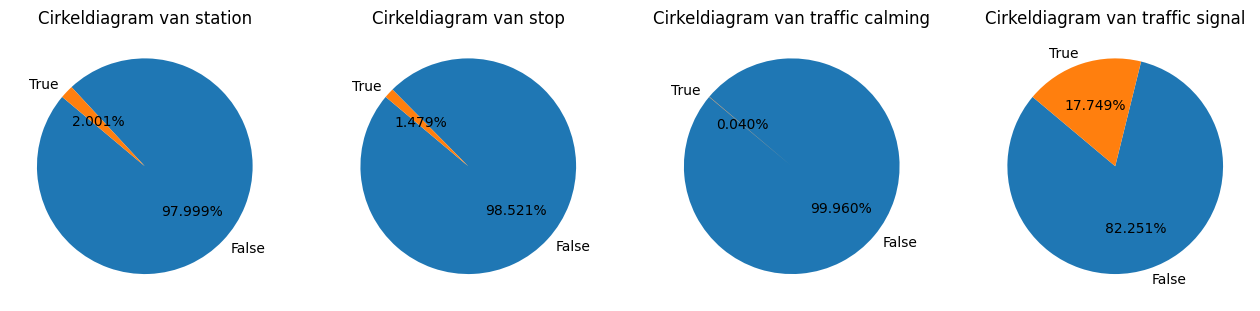

In [39]:
plt.figure(figsize=(16, 6))

plt.subplot(1,4,1)
plt.pie(americabooleans_df['Station'], labels=  ['False', 'True'], autopct='%1.3f%%', startangle=140)
plt.title('Cirkeldiagram van station')

plt.subplot(1,4,2)
plt.pie(americabooleans_df['Stop'], labels= ['False', 'True'], autopct='%1.3f%%', startangle=140)
plt.title('Cirkeldiagram van stop')

plt.subplot(1,4,3)
plt.pie(americabooleans_df['Traffic_Calming'], labels=  ['False', 'True'], autopct='%1.3f%%', startangle=140)
plt.title('Cirkeldiagram van traffic calming')

plt.subplot(1,4,4)
plt.pie(americabooleans_df['Traffic_Signal'], labels=  ['False', 'True'], autopct='%1.3f%%', startangle=140)
plt.title('Cirkeldiagram van traffic signal')

plt.show()

In [38]:
americabooleans_df["Turning_Loop"]

Amenity
False    3513617.0
True           NaN
Name: Turning_Loop, dtype: float64

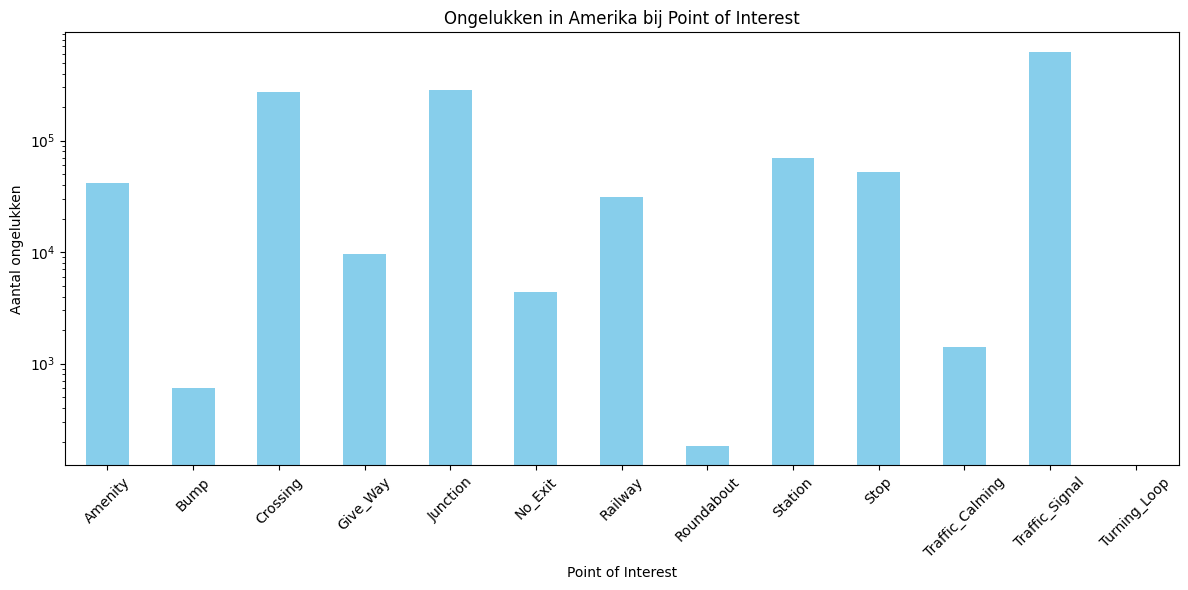

In [43]:
plt.figure(figsize=(12, 6))
americabooleans_df.loc[True].plot(kind='bar', color='skyblue')
plt.title('Ongelukken in Amerika bij Point of Interest')
plt.xlabel('Point of Interest')
plt.ylabel('Aantal ongelukken')
plt.yscale('log')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

Procentueel aantal van ongelukken dat gebeurd bij een POI

In [49]:
som = int(americabooleans_df.loc[True].sum())
perc = som/len(df)*100
print(perc)

39.68249812088227
